# CS530 Data Mining Homework 5

In [72]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline


plt.style.use('seaborn-bright')


#### Question 1

a. Read in the dataset ‘zip.train’ using the pandas ‘read_csv’ function. Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of the function to find the right parameters to properly read in this dataset. You might want to open the dataset in a text editor to inspect its structure.

In [73]:
# Your code goes here
data = pd.read_csv('zip.train', sep=' ', index_col=0, header=None)
data = data.iloc[:, :-1]

b. This dataset contains handwritten digits from 0 to 9. The first column contains the label (0-9) of each record. Each digit has 256 columns, each representing a pixel in a 16x16 image. Choose one row, use the ‘reshape’ function in numpy to reshape the row vector to 16x16, and use matplotlib to visualize the image.

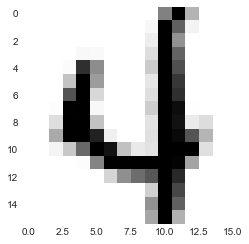

In [74]:
# Your code goes here
r = data.iloc[2].values
rowData = r.reshape(16, 16)
rowImg = plt.imshow(rowData)

c. Select a subset of the dataset with one digit of your choice. Perform PCA on the subset and show the percentage of variance you keep with 2 principle components. (You might want to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) to see how to properly fit and transform the dataset using scikit-learn.)

In [75]:
def get_principle_components(pc_data, components):
    pca = PCA(n_components=components)
    pca_values = pca.fit_transform(pc_data)
    return pca_values


r = data.loc[4.0]
principleComponents = get_principle_components(r, 2)
pcData = pd.DataFrame(data=principleComponents, columns=['First', 'Second'])

d. Plot a scatter plot of the data with the first two principal components. Find 25 records as is shown in the figure below (the red circles approximately constitute a 5x5 grid). Reshape them into images and plot them accordingly (as 5x5 [subplots](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.subplot.html)).

![plot]('plot.png')

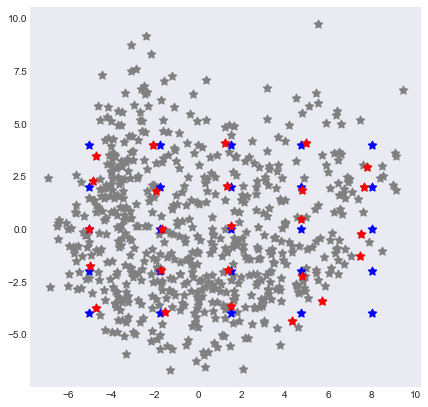

<Figure size 504x504 with 0 Axes>

In [83]:
def generate_lin_space(x_range, y_range):
    rows = []
    for i in x_range:
        for j in y_range:
            row = [i, j]
            rows.append(row)
    xval= np.delete(rows, 1, 1)
    yval = np.delete(rows, 0, 1)
    return pd.DataFrame(data=rows, columns=['X-value', 'Y-value']), xval, yval


def euclidean_distance(u, v):
    totalDistance = 0
    for i in range(len(u)):
        distance = np.math.sqrt((u[i] - v[i]) ** 2)
        totalDistance += distance
    return totalDistance

def get_min_distance_indexes(pcData, focusData):
    minimums = np.array([])
    for focus in focusData.values:
        distances = np.array([])
        for pc in pcData.values:
            distance = euclidean_distance(focus, pc)
            distances = np.append(distances, distance)
        min = np.argmin(distances)
        minimums = np.append(minimums, int(min))
    return minimums

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

fig = plt.figure(figsize=(7, 7))
x_range = np.linspace(-5,8,5)
y_range = np.linspace(-4,4,5)
focusData, x_val, y_val = generate_lin_space(x_range, y_range)


minimumIndices = get_min_distance_indexes(pcData, focusData)

minimumPoints = []
for i in minimumIndices:
    minimumPoints.append(pcData.values[int(i)])
    
#plotting


ax.scatter(pcData['First'], pcData['Second'], s=80, c = 'gray', marker=(5, 1))
ax.scatter(x_val,y_val, s=80, c = 'blue', marker=(5, 1))
minx, miny = np.array(minimumPoints).T
ax.scatter(minx, miny, s=80, c = 'red', marker=(5, 1))

In [85]:
minimumIndices = minimumIndices.astype(int)
array = r.values
array.shape
digits = array[minimumIndices,:]
digits.shape

(25, 256)

In [86]:
digits_reshape = digits.reshape([25,16,16])

C:\Users\Ryan\.conda\envs\cs-530\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


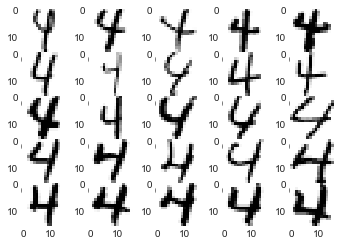

In [87]:
grid = plt.GridSpec(5,5, wspace=0, hspace = 0)
plt.subplot(grid[0,0])

for i in range(5):
    for j in range(5):
        plt.subplot(grid[i,j])
        indexes = 5*i + j
        my_plot = plt.imshow(digits_reshape[indexes,:,:])

e. Discuss what you see in the 5x5 image plot. What do you think are the features that the two principle components are capturing?

In [80]:
# When scanning across the image horizontally, there is a definitive change in the definition of the number displayed. 
# Lines that were initially straight begin to twist and curve, while lines that are initially curved become less so
# The images appear to become more similar towards the bottom of the graphed items, 
# especially as the lines become much thicker and start to lose nuance in the way they are written.
# Because of this, I believe that the principle components we are capturing are the line thickness and the curvature 
# of the position of the lines